# <p style="text-align: center;">Exploratory Data Analysis of Netflix Titles Data</p>


![Netflix Logo](https://www.edigitalagency.com.au/wp-content/uploads/Netflix-logo-red-black-png.png)


In [514]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('netflix_titles.csv')

In [3]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
data.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Typecasting and Variable Selection

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

* Convert features into appropriate data types

In [6]:
data['show_id'] = data['show_id'].astype('int64')
data['type'] = data['type'].astype('category')
data['title'] = data['title'].astype('category')
data['director'] = data['director'].astype('category')
data['cast'] = data['cast'].astype('category')
data['country'] = data['country'].astype('category')
data['release_year'] = data['release_year'].astype('int64')
data['rating'] = data['rating'].astype('category')
data['listed_in'] = data['listed_in'].astype('category')
data['description'] = data['description'].astype('category')
data['duration'] = data['duration'].astype('category')

In [7]:
date_added = pd.DatetimeIndex(data['date_added'])

In [8]:
data['added_month'] = date_added.month
data['added_date'] = date_added.day
data['added_year'] = date_added.year

In [9]:
data.drop('date_added',axis=1,inplace=True)

In [10]:
data.dtypes

show_id            int64
type            category
title           category
director        category
cast            category
country         category
release_year       int64
rating          category
duration        category
listed_in       category
description     category
added_month      float64
added_date       float64
added_year       float64
dtype: object

In [11]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
release_year       0
rating            10
duration           0
listed_in          0
description        0
added_month       11
added_date        11
added_year        11
dtype: int64

### Univariate Analysis

* Type
* Director
* Cast
* Country
* Release_year
* Rating
* Duration
* Listed_in
* Description
* Added_month
* Added_date
* Added_year

#### 1. Type of Content 

In [12]:
a = data['type'].value_counts(normalize=True)
a

Movie      0.684151
TV Show    0.315849
Name: type, dtype: float64

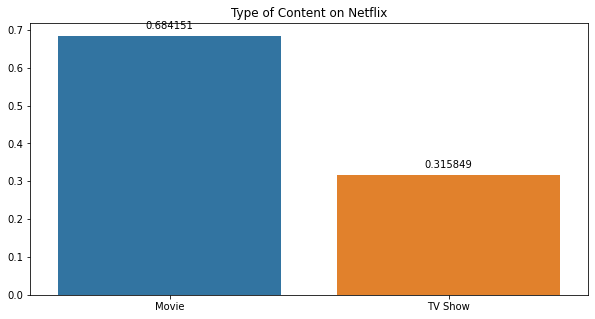

In [13]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x= a.index,y=a.values)
for p in ax.patches:
    ax.annotate('{:0f}'.format(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.title('Type of Content on Netflix')

* 68% of the content avaliable in Netflix data is in the form of Movies and 31% is in the form of TV shows.



#### 2. Director

In [14]:
data['director'].isnull().sum()

1969

* There are 1969 null values in the director column. Let us replace it with unknown

In [15]:
if 'unknown' not in data['director'].cat.categories:
    data['director'] = data['director'].cat.add_categories('unknown')

# Replace NaN values with 'unknown'
data['director'].fillna('unknown', inplace=True)

In [16]:
data['director']

0       Richard Finn, Tim Maltby
1                        unknown
2                        unknown
3                        unknown
4               Fernando Lebrija
                  ...           
6229                     unknown
6230                     unknown
6231                     unknown
6232                     unknown
6233                     unknown
Name: director, Length: 6234, dtype: category
Categories (3302, object): ['A. L. Vijay', 'A. Salaam', 'A.R. Murugadoss', 'Aadish Keluskar', ..., 'Óskar Thór Axelsson', 'Ömer Faruk Sorak', 'Şenol Sönmez', 'unknown']

In [17]:
# Top 15 directors with highest count of content in netflix data.Except for unknown 
d = data['director'].str.split(',').explode().str.strip().value_counts()[1:15]
d

Jan Suter              21
Raúl Campos            19
Jay Karas              14
Marcus Raboy           14
Jay Chapman            12
Steven Spielberg        9
Martin Scorsese         9
Umesh Mehra             8
David Dhawan            8
Shannon Hartman         8
Lance Bangs             8
Johnnie To              8
Cathy Garcia-Molina     7
Noah Baumbach           7
Name: director, dtype: int64

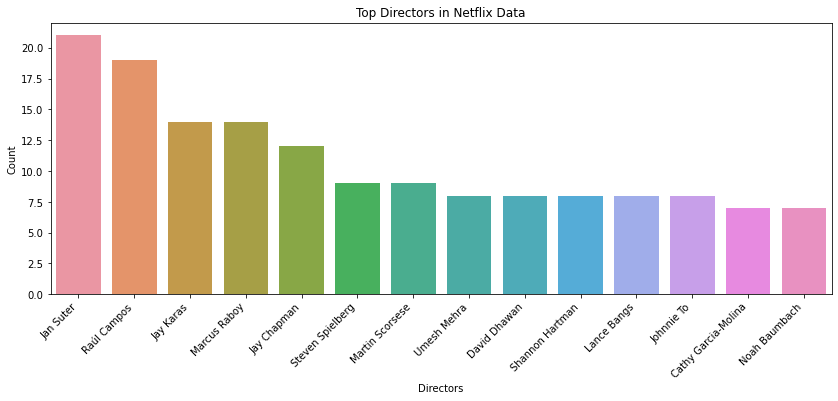

In [18]:
# Plotting top 10 directors on Netflix except unknown
plt.figure(figsize=(14, 5))
sns.barplot(x= d.index, y= d.values)
plt.title('Top Directors in Netflix Data')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* Director Jan Suter has 21 releases on Netflix with the highest count. 

#### 3. Cast

In [19]:
data['cast'].isnull().sum()

570

* There are 570 null values in the cast column. Let us replace it with unknown

In [20]:
if 'unknown' not in data['cast'].cat.categories:
    data['cast'] = data['cast'].cat.add_categories('unknown')

# Replace NaN values with 'unknown'
data['cast'].fillna('unknown', inplace=True)

In [21]:
c = data['cast'].str.split(',').explode().str.strip().value_counts()[1:15]
c

Anupam Kher         33
Shah Rukh Khan      30
Om Puri             27
Naseeruddin Shah    27
Yuki Kaji           26
Akshay Kumar        26
Takahiro Sakurai    25
Paresh Rawal        25
Amitabh Bachchan    24
Boman Irani         23
John Cleese         22
Andrea Libman       22
Ashleigh Ball       22
Kareena Kapoor      19
Name: cast, dtype: int64

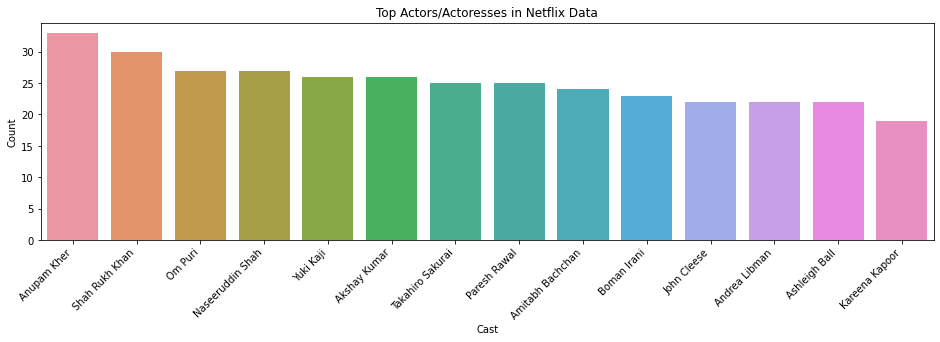

In [22]:
plt.figure(figsize=(16, 4))
sns.barplot(x= c.index, y= c.values)
plt.title('Top Actors/Actoresses in Netflix Data')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* Anupam Kher has highest number of movies/series appearance on Netflix.

#### 4. Country

In [23]:
data['country'].isnull().sum()

476

* Country column has 476 null values which can be ignored for futhur analysis.

In [24]:
# Top 20 countries with highest count of releases 
a = data['country'].str.split(',').explode().str.strip().value_counts().head(20)
a

United States     2610
India              838
United Kingdom     602
Canada             318
France             271
Japan              231
Spain              178
South Korea        162
Germany            151
Mexico             129
Australia          126
China              120
Hong Kong           97
Turkey              87
Taiwan              75
Argentina           68
Italy               67
Belgium             66
Brazil              66
Thailand            56
Name: country, dtype: int64

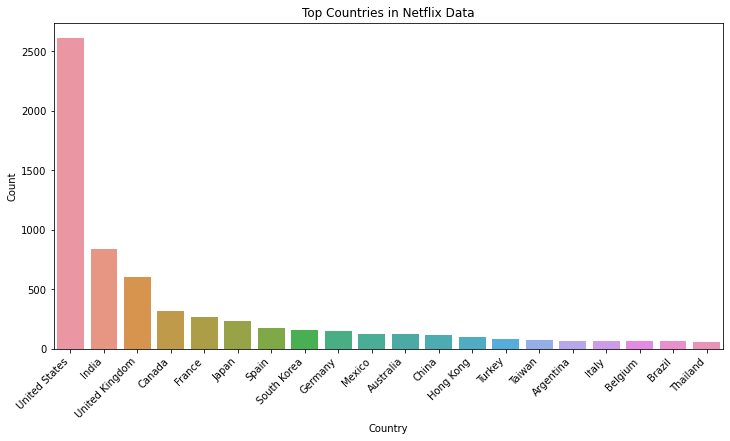

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x= a.index, y= a.values)
plt.title('Top Countries in Netflix Data')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* US and India are the top countries with respect to number of realease on the Netflix

#### 5. Release Year

In [26]:
data['release_year'].isnull().sum()

0

In [27]:
a = data['release_year'].value_counts()
a

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1966       1
1959       1
1964       1
1925       1
1963       1
Name: release_year, Length: 72, dtype: int64

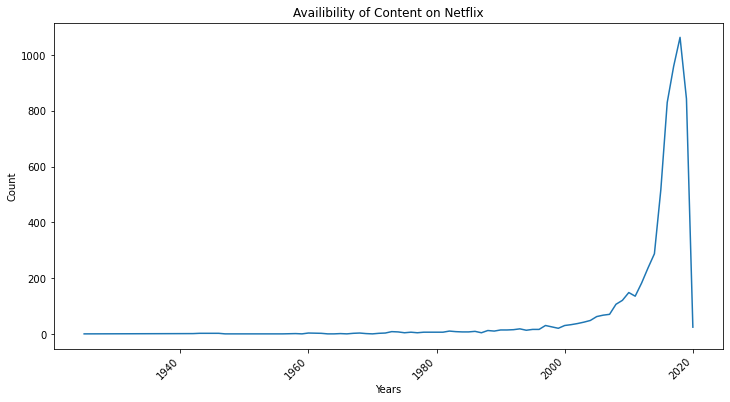

In [28]:
# Number of relases on netflix over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=a.index,y=a.values)
plt.title('Availibility of Content on Netflix')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* The availibility of content on netflix is visibly right skewed. This is due to significantly higher number of releases between 2000 to 2020.
* Let us dive deeper into releases between 2000 and 2020.

In [29]:
data['release_year'].groupby(pd.cut(data['release_year'],np.arange(data['release_year'].min(),data['release_year'].max(),10))).count()

release_year
(1925, 1935]       0
(1935, 1945]      11
(1945, 1955]       6
(1955, 1965]      15
(1965, 1975]      40
(1975, 1985]      76
(1985, 1995]     135
(1995, 2005]     353
(2005, 2015]    1877
Name: release_year, dtype: int64

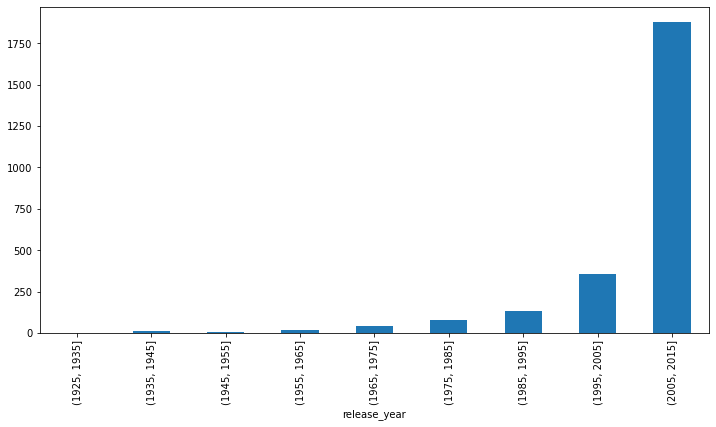

In [30]:
plt.figure(figsize=(12,6))
ax = data['release_year'].groupby(pd.cut(data['release_year'],np.arange(data['release_year'].min(),data['release_year'].max(),10))).count().plot(kind='bar')

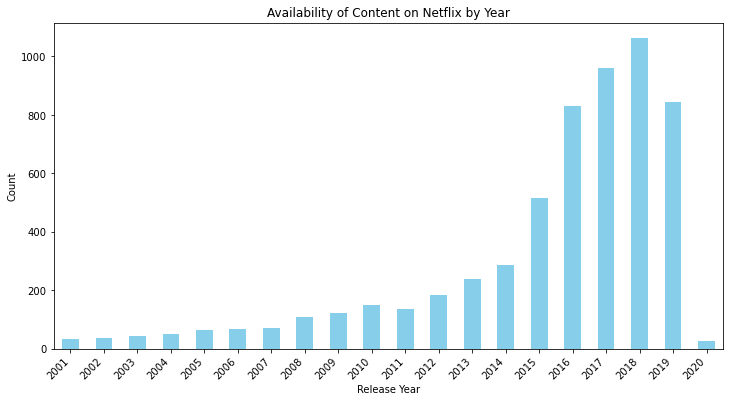

In [31]:
plt.figure(figsize=(12, 6))
data[data['release_year'] > 2000]['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Availability of Content on Netflix by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* The number of releases on Netflix have been increasing steadily from 2000 to 2019. The data for 2020 is availiable for only intial month which cannot conclude the numbe rof relases in that year

#### 6. Rating

In [32]:
data['rating'].isnull().sum()

10

In [33]:
rating = data['rating'].value_counts()
rating

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

##### Meanings of Ratings on Netflix
* TV-MA (Television Mature Audience):
 * Meaning: Intended for adults and may not be suitable for children under 17. Content may include strong and explicit language, sexual content, violence, and adult themes.
* TV-14 (Television 14 Years and Older):
 * Meaning: Parents are strongly cautioned. The program may be unsuitable for children under 14 years of age. May contain strong language, sexual content, or intense violence.
* TV-PG (Television Parental Guidance):
 * Meaning: Some material may not be suitable for children. Parents are urged to provide "parental guidance." Content may include mild language, some violence, and suggestive dialogue.
* R (Restricted):
 * Meaning: Restricted to viewers over the age of 17 or 18. Parents are strongly urged to learn more about the movie or program before taking their children to see it. May contain adult themes, strong language, sexual content, and violence.
* PG-13 (Parents Strongly Cautioned):
 * Meaning: Some material may be inappropriate for children under 13. Parents are strongly cautioned to be vigilant about the content. May contain moderate violence, some sexual content, and strong language.
* NR (Not Rated):
 * Meaning: The content has not been officially rated by a rating board. This may be used for various reasons, including independent films or certain TV programs.
* PG (Parental Guidance):
 * Meaning: Some material may not be suitable for children. Parents are urged to give "parental guidance." Content may include mild language, some violence, and suggestive dialogue.
* TV-Y7 (Television Youth 7 and Older):
 * Meaning: Designed for children aged 7 and above. May be more suitable for children who have reached at least 7 years of age. Could include mild fantasy or comedic violence.
* TV-G (Television General Audience):
 * Meaning: Suitable for all audiences. May contain little or no violence, no strong language, and little or no sexual dialogue or situations.
* TV-Y (Television Youth):
 * Meaning: Suitable for all children. Aimed at a very young audience, typically ages 2 to 6. No offensive content.
* TV-Y7-FV (Television Youth 7 and Older, Fantasy Violence):
 * Meaning: Similar to TV-Y7 but may contain fantasy violence more intense than is permitted in the TV-Y7 category.
* G (General Audience):
 * Meaning: All ages are admitted. There is no content that would offend parents if viewed by children.
* UR (Unrated):
 * Meaning: Unrated content has not been assigned a specific rating by a rating board. This could include various types of content.
* NC-17 (No One 17 and Under Admitted):
 * Meaning: No one 17 and under admitted. Content is specifically designed to be viewed by adults and is not suitable for children.








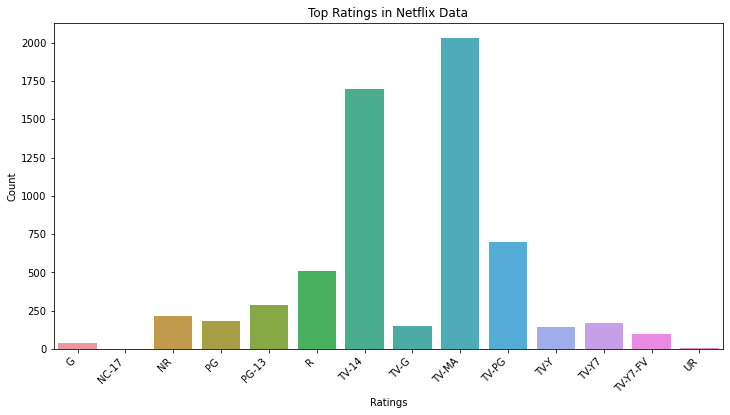

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x= rating.index, y= rating.values)
plt.title('Top Ratings in Netflix Data')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

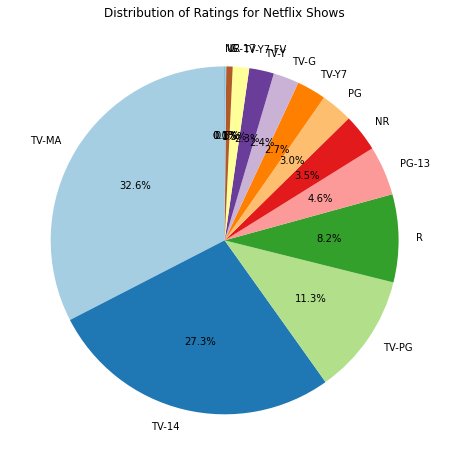

In [35]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating, labels=rating.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Ratings for Netflix Shows')
plt.show()

* A substantial portion of Netflix's content, exceeding 32%, is specifically geared towards a mature audience, featuring themes and elements that are intended for viewers aged 17 and older. Furthermore, over 27% of the content on the platform is deemed suitable for individuals above the age of 14, presenting material that may be more nuanced or contain mildly mature content. 

#### 7. Duration

In [36]:
data['duration'].isnull().sum()

0

* Data has TV shows and Movies where TV shows duration are counted in seasons and movies are in minutes

#### For TV Shows

In [37]:
# Convert the 'duration' column to lowercase and remove extra whitespaces
data['duration'] = data['duration'].str.lower().str.strip()

# Filter rows based on specified values
filtered_data = data[data['duration'].isin(['1 season', '2 seasons', '3 seasons'])]

# Count occurrences of each value in the filtered subset
result = filtered_data['duration'].value_counts()

# Display the result
print(result)


1 season     1321
2 seasons     304
3 seasons     158
Name: duration, dtype: int64


In [38]:
s = data[data['duration'].isin(['1 season', '2 seasons', '3 seasons'])]
shows = s['duration'].value_counts(0)

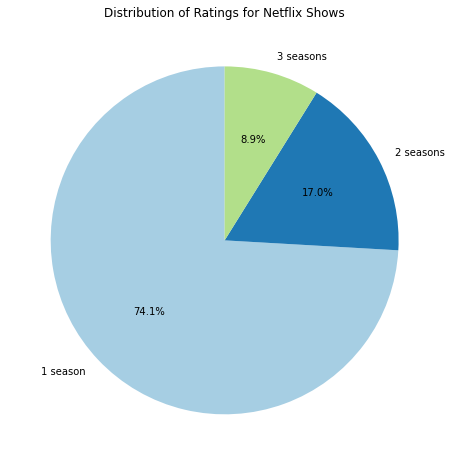

In [39]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(shows, labels=shows.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Ratings for Netflix Shows')
plt.show()

* A significant trend observed on Netflix is the prevalence of shows with limited seasons. Specifically, more than 74% of the available content consists of shows that have just a single season. This phenomenon may be influenced by various factors, including the rise of miniseries and limited series formats that aim to tell a concise and impactful story within a confined number of episodes

#### For Movies

In [40]:
m = data[~data['duration'].isin(['1 season', '2 seasons', '3 seasons'])]

In [41]:
# Convert the duration string into float datatype
m['duration'] = m['duration'].str.extract('(\d+)').astype(float)

C:\Users\user\AppData\Local\Temp/ipykernel_19040/1323247160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['duration'] = m['duration'].str.extract('(\d+)').astype(float)


In [42]:
m['duration']

0        90.0
1        94.0
4        99.0
6       110.0
7        60.0
        ...  
6225     11.0
6229     13.0
6230      4.0
6231     60.0
6233     10.0
Name: duration, Length: 4451, dtype: float64

Text(0.5, 1.0, 'within 1 std_dev=62.0 to 128.42;kurtosis=1.63;\n skew = -0.46;range = 309.0')

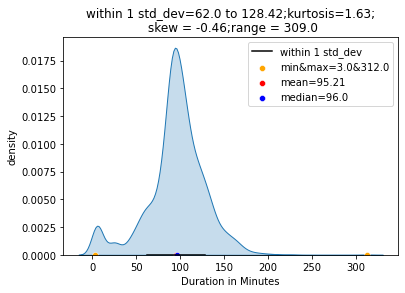

In [43]:
maxi = round(m['duration'].max(),2)
mini = round(m['duration'].min(),2)
rani = round(maxi - mini,2)
meani = round(m['duration'].mean(),2)
mediani = round(m['duration'].median(),2)
std_dev = round(m['duration'].std(),2)
skewi = round(m['duration'].skew(),2)
kurt = round(m['duration'].kurtosis(),2)

points = round(meani-std_dev,2), round(meani+std_dev,2)

sns.kdeplot(x=m['duration'],fill=True)
sns.lineplot(x=points, y=[0,0], color = 'black', label = "within 1 std_dev")
sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = f"min&max={mini}&{maxi}")
sns.scatterplot(x=[meani], y=[0], color = 'red', label = f"mean={meani}")
sns.scatterplot(x=[mediani], y=[0], color = 'blue', label = f"median={mediani}")
plt.xlabel('Duration in Minutes')
plt.ylabel('density')
plt.title(f'within 1 std_dev={points[0]} to {points[1]};kurtosis={kurt};\n skew = {skewi};range = {rani}')


* The values on lower end of duration is as low as three minutes which can be a outlier for movies. 

<AxesSubplot:xlabel='duration'>

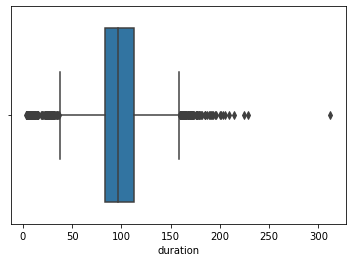

In [44]:
sns.boxplot(x=m['duration'])

In [45]:
m[m['duration'] <= 10]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_date,added_year
44,81176188,Movie,American Factory: A Conversation with the Obamas,unknown,"President Barack Obama, Michelle Obama, Julia ...",NaN,2019,TV-G,10.0,Documentaries,Barack and Michelle Obama talk with directors ...,9.0,5.0,2019.0
2478,70304298,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",unknown,United States,2014,TV-Y7,3.0,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",6.0,4.0,2019.0
5584,70270745,TV Show,Ripper Street,unknown,"Matthew Macfadyen, Jerome Flynn, Adam Rothenbe...","United Kingdom, Ireland",2017,TV-MA,5.0,"British TV Shows, Crime TV Shows, TV Dramas",It's been six months since the last Jack the R...,9.0,8.0,2017.0
5585,70177067,TV Show,Haven,unknown,"Emily Rose, Lucas Bryant, Nicholas Campbell, E...","Canada, United States",2015,TV-14,5.0,"Classic & Cult TV, TV Horror, TV Mysteries","Residents of Haven, Maine, are plagued by supe...",9.0,8.0,2015.0
5591,70197049,TV Show,Once Upon a Time,"Mario Van Peebles, Ralph Hemecker, Gwyneth Hor...","Lana Parrilla, Robert Carlyle, Jared Gilmore, ...",United States,2018,TV-PG,7.0,"TV Dramas, TV Sci-Fi & Fantasy","In this fantasy series, a young woman is drawn...",9.0,6.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,70196145,TV Show,New Girl,unknown,"Zooey Deschanel, Jake Johnson, Max Greenfield,...",United States,2017,TV-14,7.0,"Romantic TV Shows, TV Comedies","Still rebounding from a breakup, Jessica Day m...",4.0,11.0,2019.0
6222,70136122,TV Show,Weeds,unknown,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,2012,TV-MA,8.0,"TV Comedies, TV Dramas",A suburban mother starts selling marijuana to ...,4.0,1.0,2014.0
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,unknown,Anthony Bourdain,United States,2018,TV-PG,5.0,Docuseries,This CNN original series has chef Anthony Bour...,NaN,NaN,NaN
6230,70286564,TV Show,Maron,unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,2016,TV-MA,4.0,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaN,NaN,NaN


#### 8. Listed In

In [46]:
data['listed_in'].isnull().sum()

0

In [47]:
listed = data['listed_in'].str.split(',').explode().str.strip().value_counts().head(20)
listed

International Movies        1927
Dramas                      1623
Comedies                    1113
International TV Shows      1001
Documentaries                668
TV Dramas                    599
Action & Adventure           597
Independent Movies           552
TV Comedies                  436
Thrillers                    392
Children & Family Movies     378
Romantic Movies              376
Crime TV Shows               363
Kids' TV                     328
Stand-Up Comedy              281
Docuseries                   279
Romantic TV Shows            278
Horror Movies                262
Music & Musicals             243
British TV Shows             210
Name: listed_in, dtype: int64

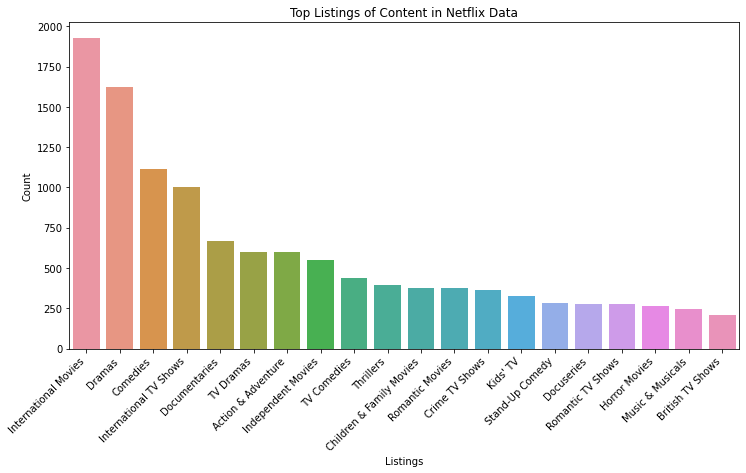

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x= listed.index, y= listed.values)
plt.title('Top Listings of Content in Netflix Data')
plt.xlabel('Listings')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

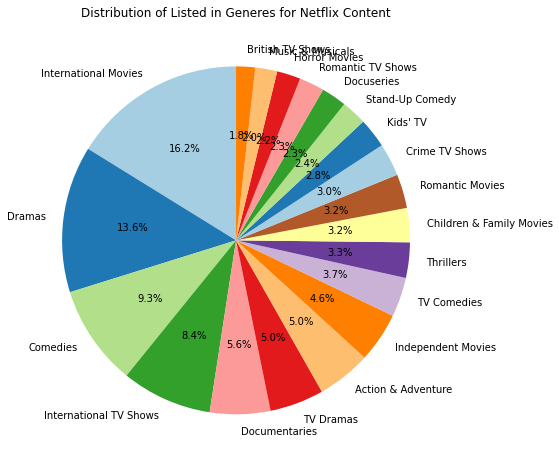

In [49]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(listed, labels=listed.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Listed in Generes for Netflix Content')
plt.show()

* The most popular releases on Netflix encompass a diverse array of genres, with particular emphasis on International Movies, Dramas, and Comedies. This diversity reflects the streaming platform's commitment to catering to a broad and global audience, allowing viewers to explore content beyond their local and cultural boundaries. International Movies, in particular, have gained prominence, highlighting Netflix's dedication to providing a rich selection of films from various countries and languages. 

#### 9. Description

In [50]:
data1 = data.copy()

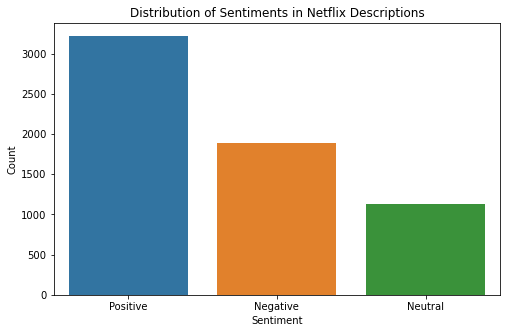

In [51]:
from textblob import TextBlob

# Define a function for sentiment analysis
def analyze_sentiment(description):
    
    analysis = TextBlob(str(description))
    # Classify the polarity as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'description' column
data1['sentiment'] = data['description'].apply(analyze_sentiment)

# Display the distribution of sentiments
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data1, order=data1['sentiment'].value_counts().index)
plt.title('Distribution of Sentiments in Netflix Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


#### 10. Added Year

In [52]:
data['added_year'].value_counts()

2019.0    2349
2018.0    1782
2017.0    1300
2016.0     456
2020.0     184
2015.0      90
2014.0      25
2011.0      13
2013.0      12
2012.0       7
2009.0       2
2008.0       2
2010.0       1
Name: added_year, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


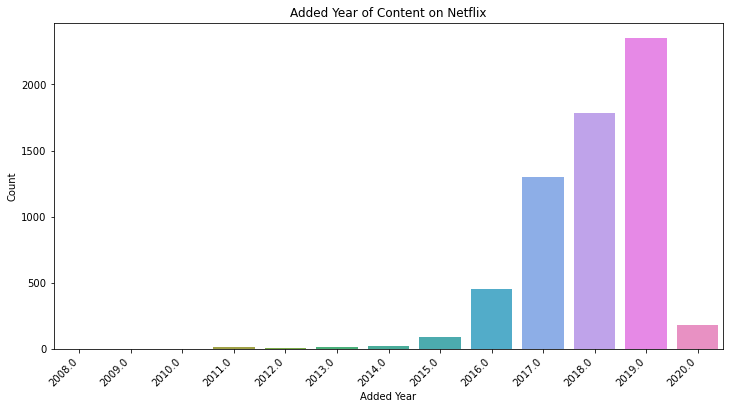

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data['added_year'])
plt.title('Added Year of Content on Netflix')
plt.xlabel('Added Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

* Content expansion on Netflix has been ongoing since 2016, reaching its zenith in 2019 with a notable surge in new additions. The subsequent drop in content numbers in 2020 is attributed to a lack of comprehensive data for the entire year rather than a deliberate reduction in content acquisition.

### Bivariate Analysis

In [54]:
data.dtypes

show_id            int64
type            category
title           category
director        category
cast            category
country         category
release_year       int64
rating          category
duration          object
listed_in       category
description     category
added_month      float64
added_date       float64
added_year       float64
dtype: object

### 1. Analysis by Type of Content 

#### Let us define a function to analyze different categorical features against the type of content such as Movies and TV Shows.

#### * For Categorical Categorical Variables 

In [55]:
def BVA(data, var):
    movies = data[data['type'] == 'Movie'][var].str.split(',').explode().str.strip().value_counts().head(15)
    shows = data[data['type'] == 'TV Show'][var].str.split(',').explode().str.strip().value_counts().head(15)

    # Ignore the unknown columns
    if movies.index[0] == 'unknown':
        movies = movies[1:]
    
    if shows.index[0] == 'unknown':
        shows = shows[1:]

    fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # Adjust figsize as needed

    # Plot for movies
    sns.barplot(x=movies.index, y=movies.values, ax=ax[0], color='skyblue')
    ax[0].set_title(f'Movies - {var.capitalize()}')
    ax[0].set_xlabel(var.capitalize())
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Plot for shows
    sns.barplot(x=shows.index, y=shows.values, ax=ax[1], color='salmon')
    ax[1].set_title(f'TV Shows - {var.capitalize()}')
    ax[1].set_xlabel(var.capitalize())
    ax[1].set_ylabel('Count')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()  # To prevent overlapping of axis labels
    plt.show()


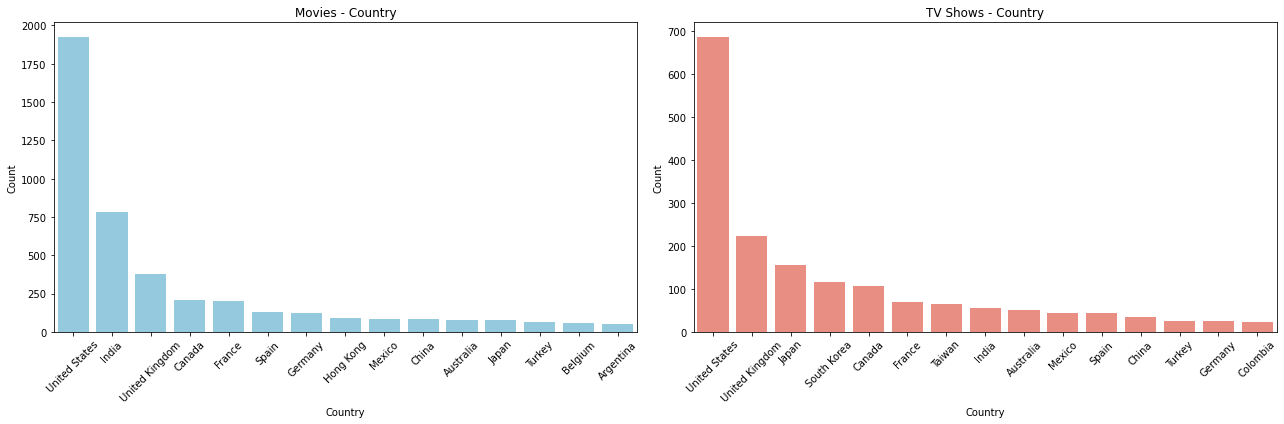

In [56]:
BVA(data,'country')

* The analysis of released movies and TV shows on Netflix across different countries reveals distinct patterns in content production. The United States emerges as the predominant contributor, leading in both movies and TV shows. 
* UK is more prominent with its TV shows than Movies while India is second top contributor of movies on Netflix.

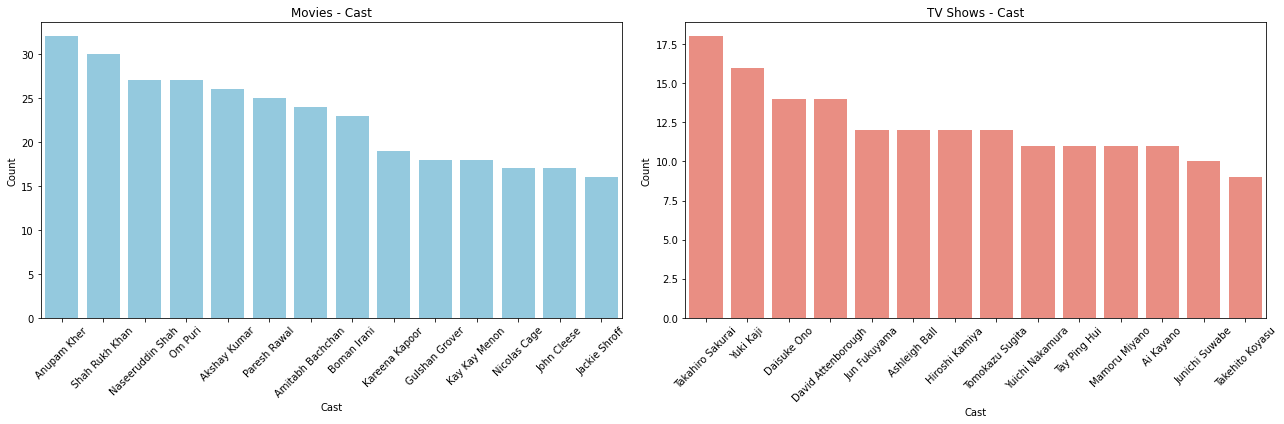

In [57]:
BVA(data,'cast')

* Anupam Kher, Shahrukh Khan are the top movie artists while Takahiro Sakurai and Yuki Kaji are artists with most appearances in TV Shows.

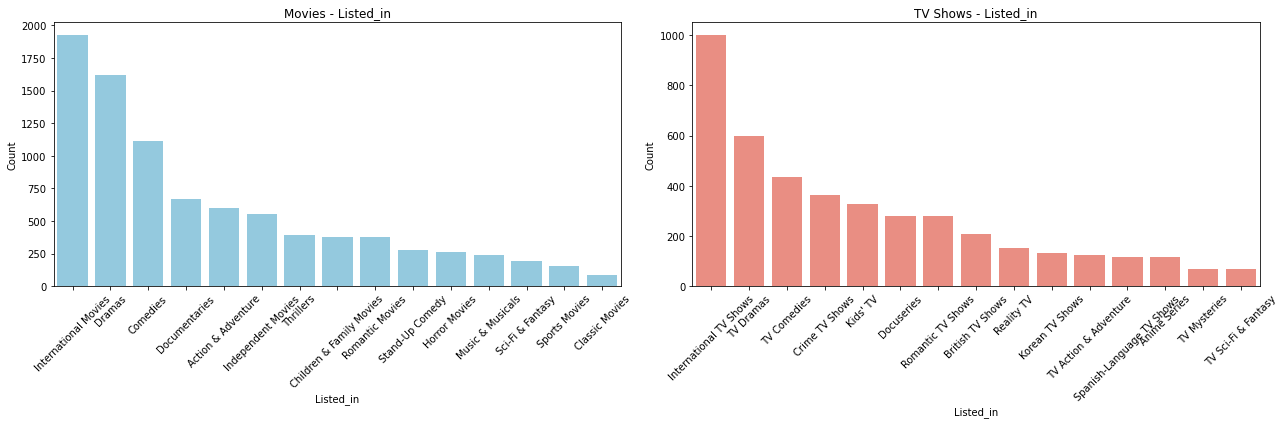

In [58]:
BVA(data,'listed_in')

* The type of content on Netflix reveals a distinctive trend, with International Movies and International TV Shows emerging as the most favored categories, closely followed by Dramas in both domains. This trend underscores the global appeal and diverse viewing preferences of Netflix subscribers. 

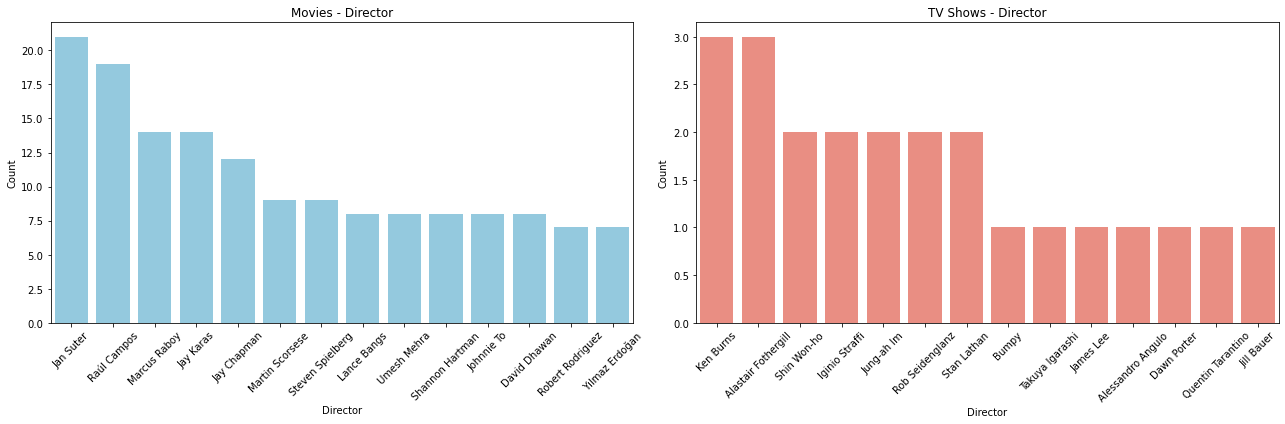

In [59]:
BVA(data,'director')

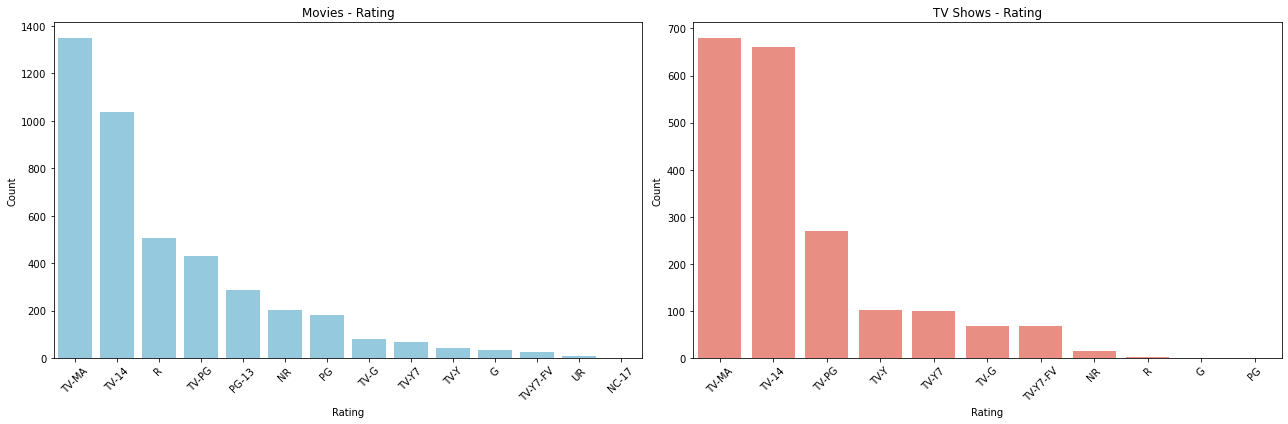

In [60]:
BVA(data,'rating')

* TV-MA as well as TV-14 are most appreared ratings on Netflix while R rated content takes 3rd spot in movies and has significantly lower count in terms of TV Shows.

In [61]:
data.dtypes

show_id            int64
type            category
title           category
director        category
cast            category
country         category
release_year       int64
rating          category
duration          object
listed_in       category
description     category
added_month      float64
added_date       float64
added_year       float64
dtype: object

#### * For Numerical and Categorical Features

In [62]:
def BVA_Num(data, var):
    movies = data[data['type'] == 'Movie']['release_year']
    shows = data[data['type'] == 'TV Show']['release_year']

    # Get the top 25 years for movies and TV shows
    top_movies_years = movies.value_counts().head(25).index
    top_shows_years = shows.value_counts().head(25).index

    # Filter data for the top 25 years
    movies = movies[movies.isin(top_movies_years)]
    shows = shows[shows.isin(top_shows_years)]

    fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # Adjust figsize as needed

    # Plot for movies
    sns.countplot(x=movies.values, ax=ax[0], color='skyblue')
    ax[0].set_title('Movies')
    ax[0].set_xlabel('Release Year')
    ax[0].set_ylabel('Count')
    ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Plot for shows
    sns.countplot(x=shows.values, ax=ax[1], color='salmon')
    ax[1].set_title('TV Shows')
    ax[1].set_xlabel('Release Year')
    ax[1].set_ylabel('Count')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()  # To prevent overlapping of axis labels
    plt.show()


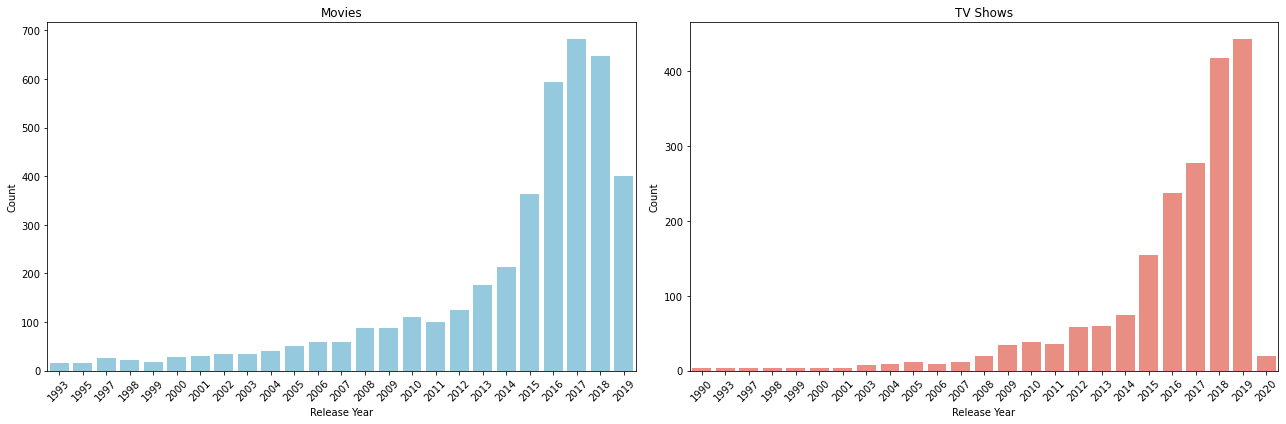

In [63]:
BVA_Num(data,'release_year')

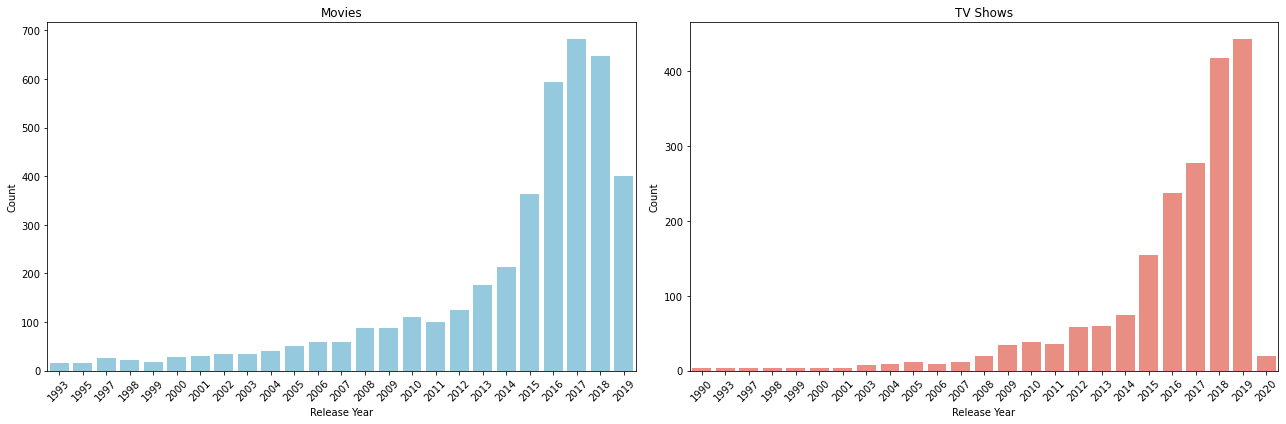

In [64]:
BVA_Num(data,'added_year')

* Netflix has highest number of movies released in 2017 and highest number of TV shows released in 2019. And same pattern is followed by added years as well.

### 2. Analysis by Countries

* Create a copy of data frame to aviod changes in original data frame.

In [65]:
data1 = data.copy()

#### Release Years by Countries 

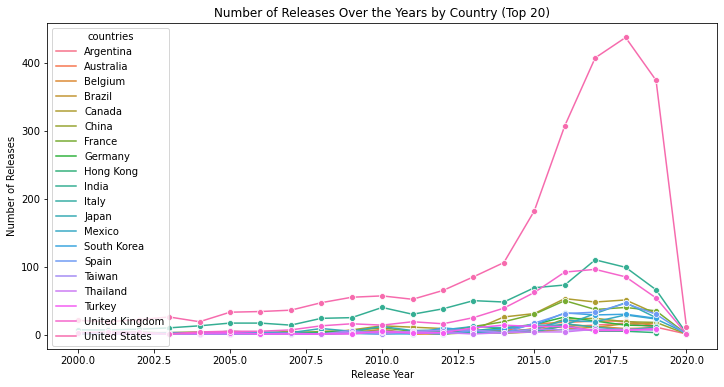

In [66]:
data1['countries'] = data['country'].str.split(',')

# Create a new DataFrame to store the exploded data
expanded_data = data1.explode('countries')

# To avoid leading or trailing whitespaces in the countries
expanded_data['countries'] = expanded_data['countries'].str.strip()

# Count the number of releases for each country and year
release_count_by_country_year = expanded_data.groupby(['countries', 'release_year']).size().reset_index(name='count')

# Get the top 20 countries based on total releases
top_countries = release_count_by_country_year.groupby('countries')['count'].sum().nlargest(20).index

# Filter the DataFrame to include only the top 20 countries
release_count_top_countries = release_count_by_country_year[
    (release_count_by_country_year['countries'].isin(top_countries)) &
    (release_count_by_country_year['release_year'].isin([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]))
]

# Plotting using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=release_count_top_countries, x='release_year', y='count', hue='countries', marker='o')

# Title and labels
plt.title('Number of Releases Over the Years by Country (Top 20)')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')

# Show the plot
plt.show()

* Analysis of release years by top 20 countries.

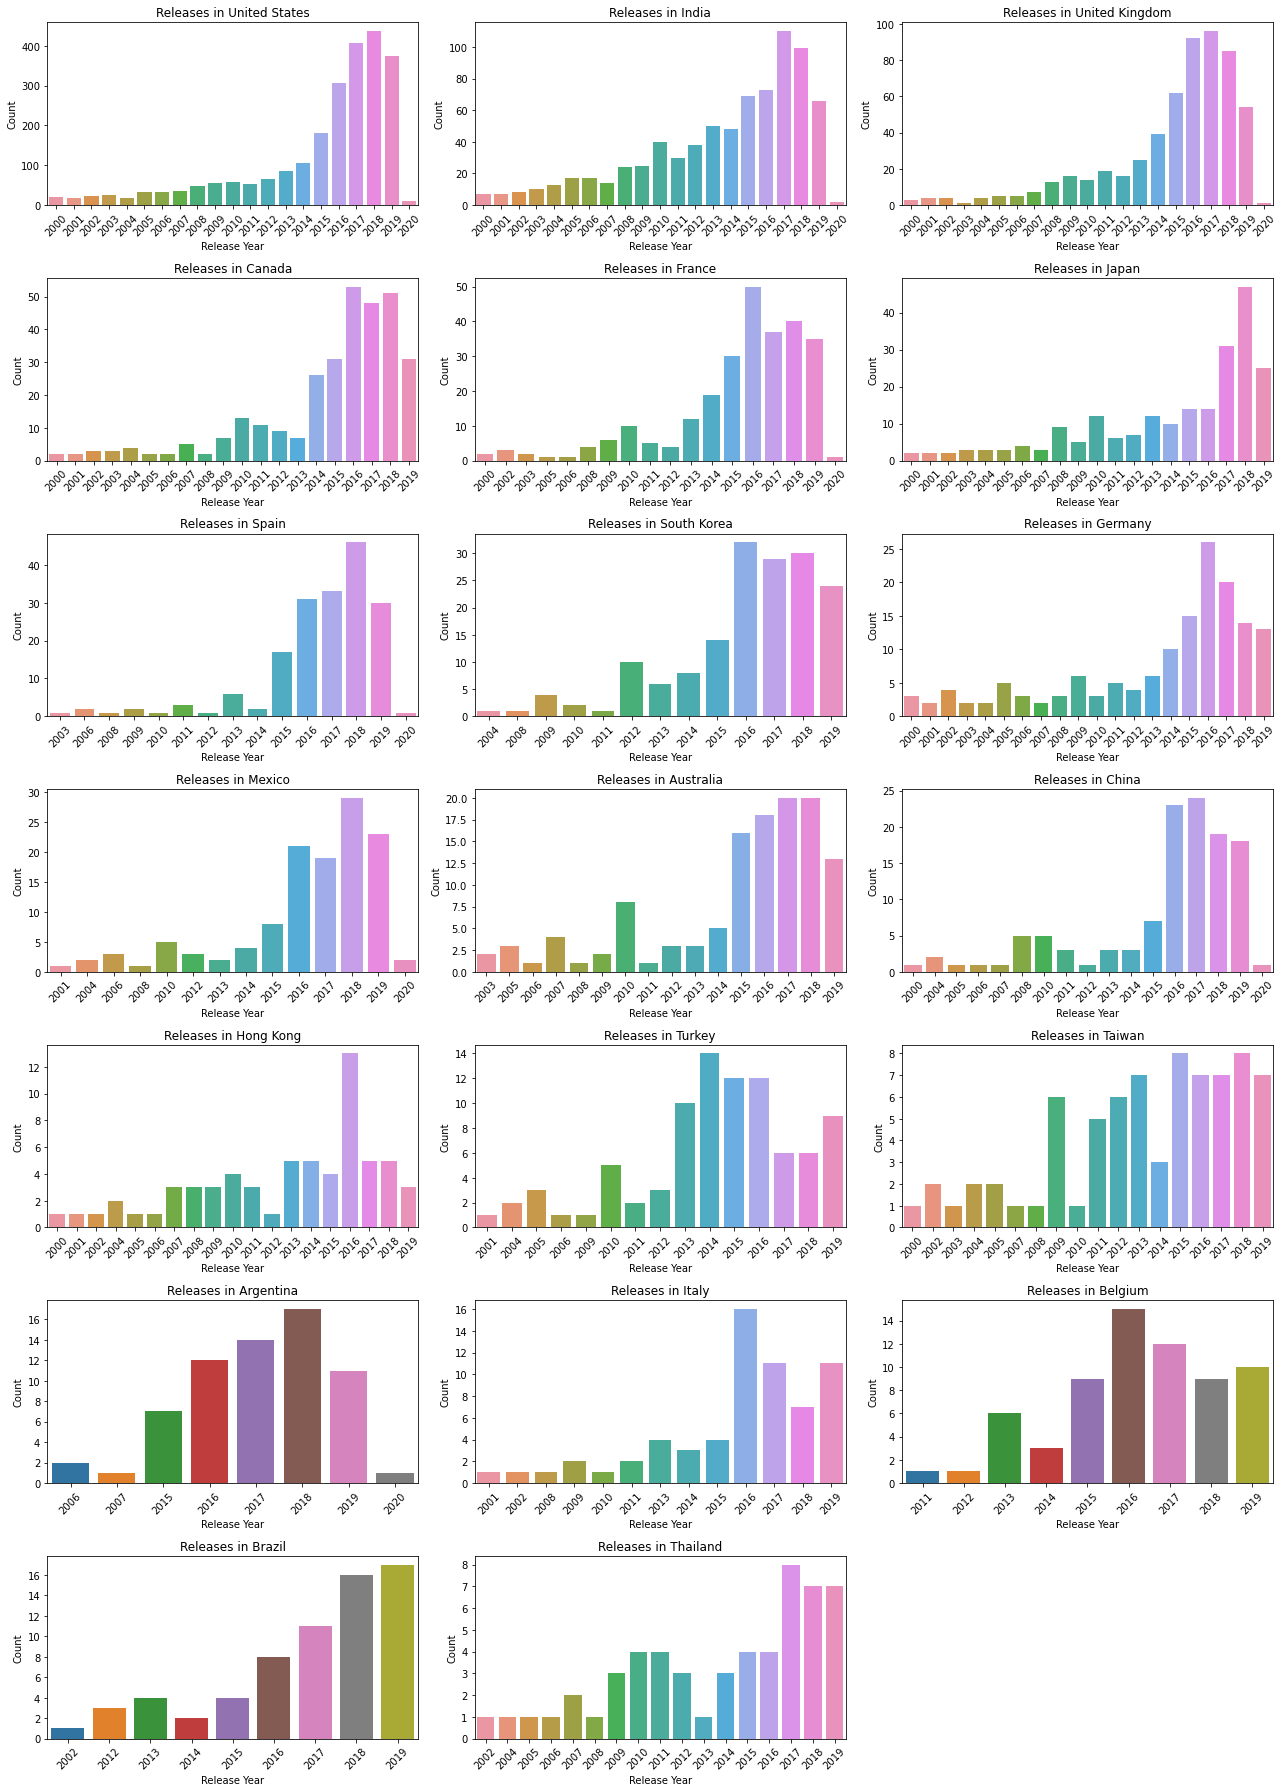

In [67]:
# Assuming 'data' is your DataFrame

# Split countries in the 'country' column
data1 = data.copy()  # Create a copy of the original data
data1['countries'] = data1['country'].str.split(',')

# Create a new DataFrame to store the exploded data
expanded_data = data1.explode('countries')

# To avoid leading or trailing whitespaces in the countries
expanded_data['countries'] = expanded_data['countries'].str.strip()


# Filter the DataFrame to include only the top 20 countries
top_countries = expanded_data['countries'].value_counts().nlargest(20).index
expanded_data_top_countries = expanded_data[expanded_data['countries'].isin(top_countries)]

# Filter the DataFrame to include only the years from 2000 to 2020
expanded_data_top_countries = expanded_data_top_countries[
    (expanded_data_top_countries['release_year'] >= 2000) &
    (expanded_data_top_countries['release_year'] <= 2020)
]

# Aggregate the data by counting releases for each country and year
agg_data = expanded_data_top_countries.groupby(['countries', 'release_year']).size().reset_index(name='count')

# Create count plots for each country
plt.figure(figsize=(18, 25))
for i, country in enumerate(top_countries, 1):
    plt.subplot(7, 3, i)
    sns.barplot(x='release_year', y='count', data=agg_data[agg_data['countries'] == country])
    plt.title(f'Releases in {country}')
    plt.xlabel('Release Year')
    plt.ylabel('Count')
    plt.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


* Netflix US has highest number of content released in 2018. Netflix India has highest number of content released in 2017. While South Korea and Germany has highest number of content released in 2016. 

#### Added Years by Countries

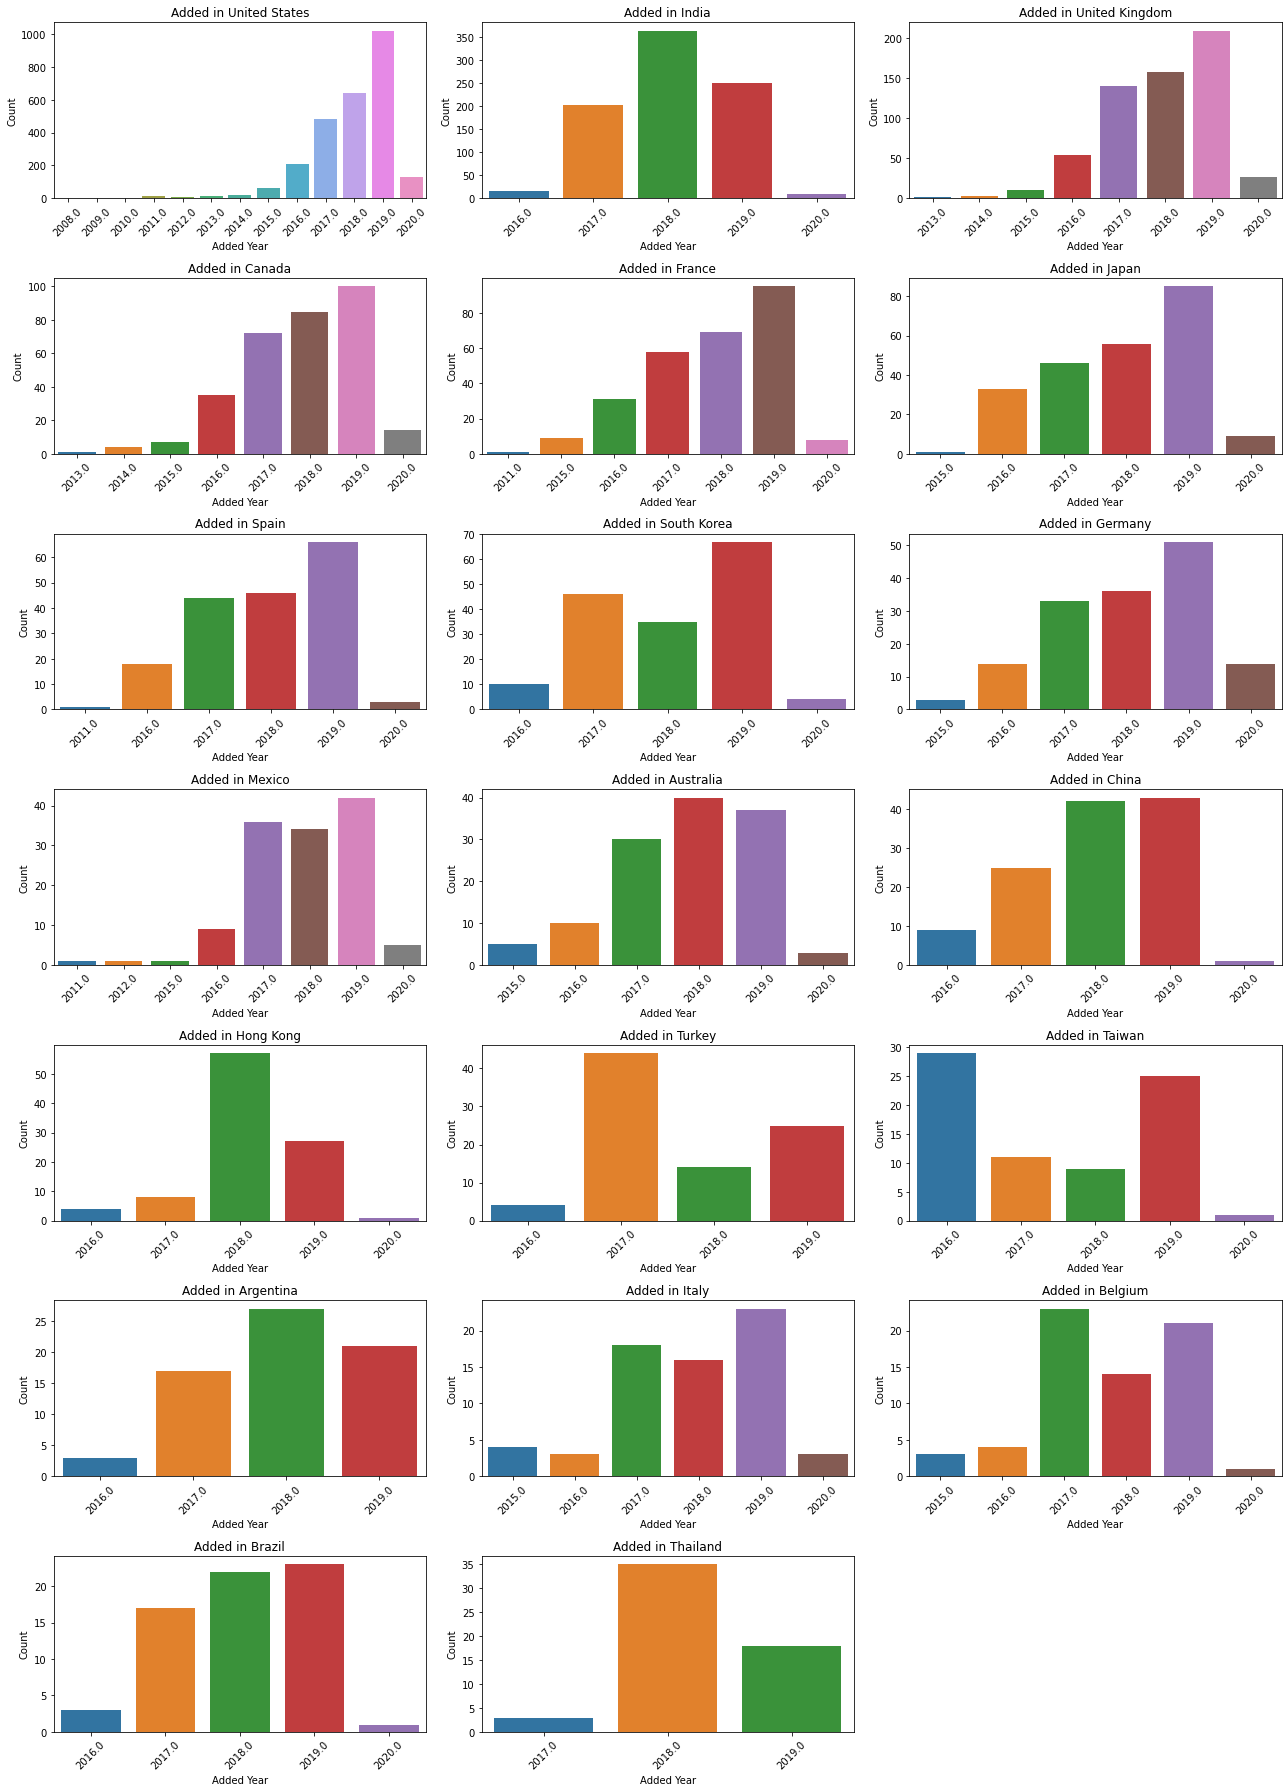

In [68]:
data1['countries'] = data['country'].str.split(',')

# Create a new DataFrame to store the exploded data
expanded_data = data1.explode('countries')

# To avoid leading or trailing whitespaces in the countries
expanded_data['countries'] = expanded_data['countries'].str.strip()

# Filter the DataFrame to include only the top 20 countries
top_countries = expanded_data['countries'].value_counts().nlargest(20).index
expanded_data_top_countries = expanded_data[expanded_data['countries'].isin(top_countries)]

# Filter the DataFrame to include only the years from 2000 to 2020
expanded_data_top_countries = expanded_data_top_countries[
    (expanded_data_top_countries['added_year'] >= 2000) &
    (expanded_data_top_countries['added_year'] <= 2020)
]

# Create count plots for each country
plt.figure(figsize=(18, 25))
for i, country in enumerate(top_countries, 1):
    plt.subplot(7, 3, i)
    sns.countplot(x='added_year', data=expanded_data_top_countries[expanded_data_top_countries['countries'] == country])
    plt.title(f'Added in {country}')
    plt.xlabel('Added Year')
    plt.ylabel('Count')
    plt.tick_params(axis='x', rotation=45) 

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* It is clear from the visualization that US has been adding content on Netflix since 2008.
* While countries like Mexico,Spain and France joined in 2011. UK and Canada started adding content in 2013. 

#### Ratings of Content Released by Countries

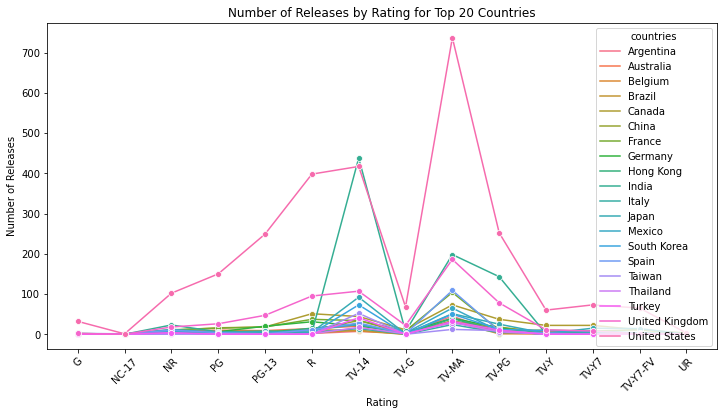

In [69]:
# Split countries in the 'country' column
data['countries'] = data['country'].str.split(',')

# Create a new DataFrame to store the exploded data
expanded_data = data.explode('countries')

# To avoid leading or trailing whitespaces in the countries
expanded_data['countries'] = expanded_data['countries'].str.strip()

# Count the number of releases for each country and rating
release_count_by_country_rating = expanded_data.groupby(['countries', 'rating']).size().reset_index(name='count')

# Get the top 20 countries based on total releases
top_countries = release_count_by_country_rating.groupby('countries')['count'].sum().nlargest(20).index

# Filter the DataFrame to include only the top 20 countries and ratings
release_count_top_countries = release_count_by_country_rating[
    (release_count_by_country_rating['countries'].isin(top_countries))
]

# Plotting using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=release_count_top_countries, x='rating', y='count', hue='countries', marker='o', sort=False)

# Title and labels
plt.title('Number of Releases by Rating for Top 20 Countries')
plt.xlabel('Rating')
plt.ylabel('Number of Releases')
plt.tick_params(axis='x', rotation=45)  
# Show the plot
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


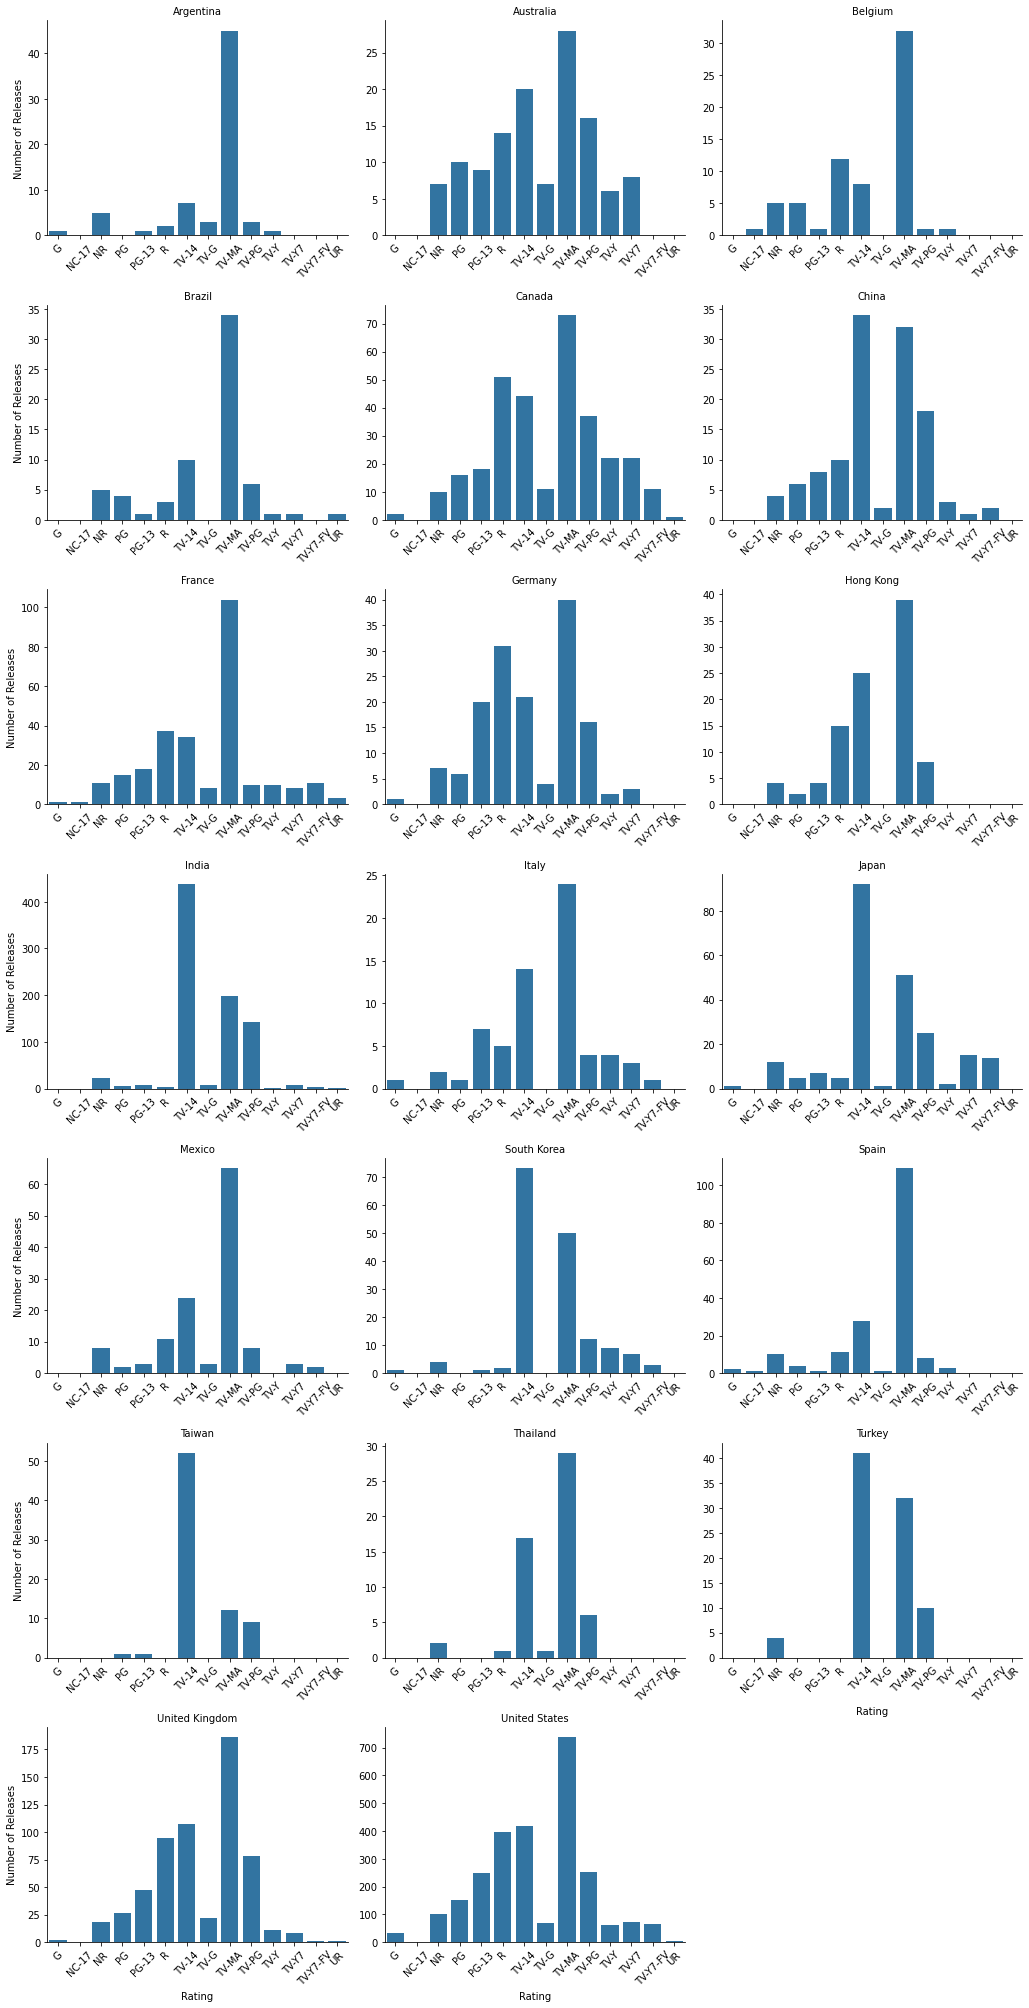

In [70]:
# Split countries in the 'country' column
data1['countries'] = data['country'].str.split(',')

# Create a new DataFrame to store the exploded data
expanded_data = data1.explode('countries')

# To avoid leading or trailing whitespaces in the countries
expanded_data['countries'] = expanded_data['countries'].str.strip()

# Count the number of releases for each country and rating
release_count_by_country_rating = expanded_data.groupby(['countries', 'rating']).size().reset_index(name='count')

# Get the top 20 countries based on total releases
top_countries = release_count_by_country_rating.groupby('countries')['count'].sum().nlargest(20).index

# Filter the DataFrame to include only the top 20 countries and ratings
release_count_top_countries = release_count_by_country_rating[
    (release_count_by_country_rating['countries'].isin(top_countries))
]

# Create a separate plot for each country using FacetGrid
g = sns.FacetGrid(release_count_top_countries, col='countries', col_wrap=3, height=4, sharey=False, sharex = False,aspect=1.2)
g.map(sns.barplot, 'rating', 'count')

# Titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Rating', 'Number of Releases')
g.set_xticklabels(rotation=45) 
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
* 

In [484]:
data.dtypes

show_id            int64
type            category
title           category
director        category
cast            category
country         category
release_year       int64
rating          category
duration          object
listed_in       category
description     category
added_month      float64
added_date       float64
added_year       float64
countries         object
dtype: object

#### Release Years and Ratings

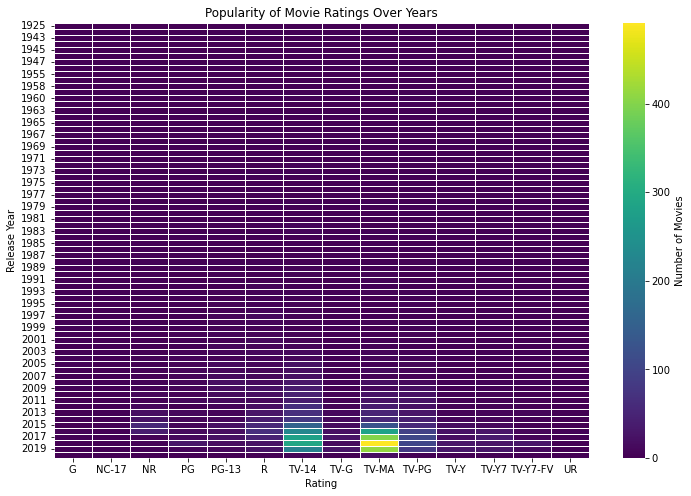

In [511]:
#Create a pivot table to prepare data for the heatmap
pivot_data = data.pivot_table(index='release_year', columns='rating', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=False, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Movies'})

# Titles and labels
plt.title('Popularity of Movie Ratings Over Years')
plt.xlabel('Rating')
plt.ylabel('Release Year')

# Show the plot
plt.show()

* Years before 2000 have very few values which can be ignored for better visualization

In [488]:
data2 = data[(data['release_year'] >= 2000) & (data['release_year'] <= 2019)]

In [489]:
pivot_data = data2.pivot_table(index='release_year', columns='rating', aggfunc='size', fill_value=0)
pivot_data

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
release_year,,,,,,,,,,,,,,
2000,2,0,0,4,6,7,5,0,0,5,1,0,1,0
2001,2,0,1,3,3,12,5,1,3,2,0,1,1,0
2002,0,0,1,3,11,9,6,0,5,2,0,0,1,0
2003,0,0,1,5,7,10,11,0,6,2,0,0,1,0
2004,2,0,4,6,5,6,9,0,8,7,0,1,1,0
2005,2,0,1,4,11,8,23,0,3,8,0,2,1,0
2006,0,0,4,8,9,9,18,0,12,6,0,1,1,0
2007,1,0,5,8,12,10,21,0,4,4,2,1,1,2
2008,0,0,3,7,19,12,29,3,18,11,0,2,2,1


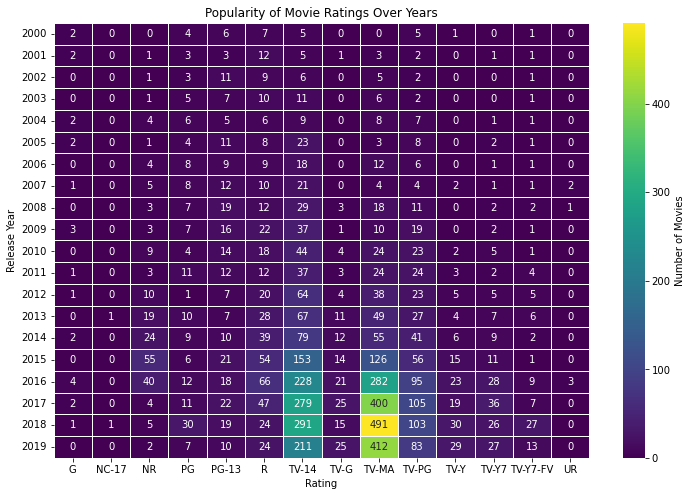

In [331]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Movies'})

# Titles and labels
plt.title('Popularity of Movie Ratings Over Years')
plt.xlabel('Rating')
plt.ylabel('Release Year')

# Show the plot
plt.show()

In [332]:
data.dtypes

show_id            int64
type            category
title           category
director        category
cast            category
country         category
release_year       int64
rating          category
duration          object
listed_in       category
description     category
added_month      float64
added_date       float64
added_year       float64
countries         object
dtype: object

#### Added Years and Ratings

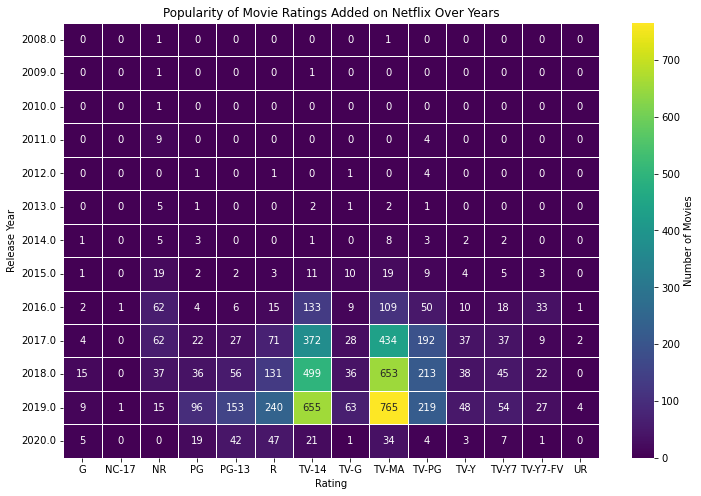

In [494]:
#Create a pivot table to prepare data for the heatmap
pivot_data = data.pivot_table(index='added_year', columns='rating', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Movies'})

# Titles and labels
plt.title('Popularity of Movie Ratings Added on Netflix Over Years')
plt.xlabel('Rating')
plt.ylabel('Release Year')

# Show the plot
plt.show()

* The analysis of Netflix content over the years, as visualized, reveals a notable trend in the addition of TV-MA (Mature Audiences) and TV-14 (Parents Strongly Cautioned) rated content. From the visualization, it is evident that the years 2016 to 2019 experienced a substantial increase in the number of TV-MA and TV-14 titles, reaching a peak in 2019.

#### Release Years by Listed Generes

In [496]:
listed = data['listed_in'].str.split(',').explode().str.strip().value_counts().head(20)
listed

International Movies        1927
Dramas                      1623
Comedies                    1113
International TV Shows      1001
Documentaries                668
TV Dramas                    599
Action & Adventure           597
Independent Movies           552
TV Comedies                  436
Thrillers                    392
Children & Family Movies     378
Romantic Movies              376
Crime TV Shows               363
Kids' TV                     328
Stand-Up Comedy              281
Docuseries                   279
Romantic TV Shows            278
Horror Movies                262
Music & Musicals             243
British TV Shows             210
Name: listed_in, dtype: int64

In [497]:
data1['listed'] = data['listed_in'].str.split(',')

# Create a new DataFrame to store the exploded data
expanded_data = data1.explode('listed')

In [498]:
expanded_data = expanded_data[expanded_data['release_year'] >= 2000]

In [499]:
pivot1_data = expanded_data.pivot_table(index='release_year', columns='listed', aggfunc='size', fill_value=0)
pivot1_data

listed,Anime Features,Children & Family Movies,Classic & Cult TV,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,Faith & Spirituality,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
release_year,,,,,,,,,,,,,,,,,,,,,
2000,0,0,0,6,0,1,1,0,7,1,...,0,1,0,1,0,0,0,0,0,0
2001,1,0,0,6,0,2,0,2,7,0,...,0,1,0,0,0,0,0,0,0,1
2002,1,0,0,6,0,0,0,0,5,0,...,0,1,0,0,0,0,0,0,0,1
2003,1,0,0,8,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
2004,2,1,0,9,0,3,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
2005,1,0,0,6,1,0,0,1,8,1,...,0,1,0,0,1,1,0,0,0,0
2006,1,0,0,7,1,1,0,2,9,1,...,0,4,0,0,0,0,0,0,0,0
2007,1,0,0,10,0,2,0,0,7,1,...,0,1,1,0,1,1,0,0,0,1
2008,2,2,0,8,1,2,0,2,13,3,...,0,3,0,0,0,0,0,0,0,0


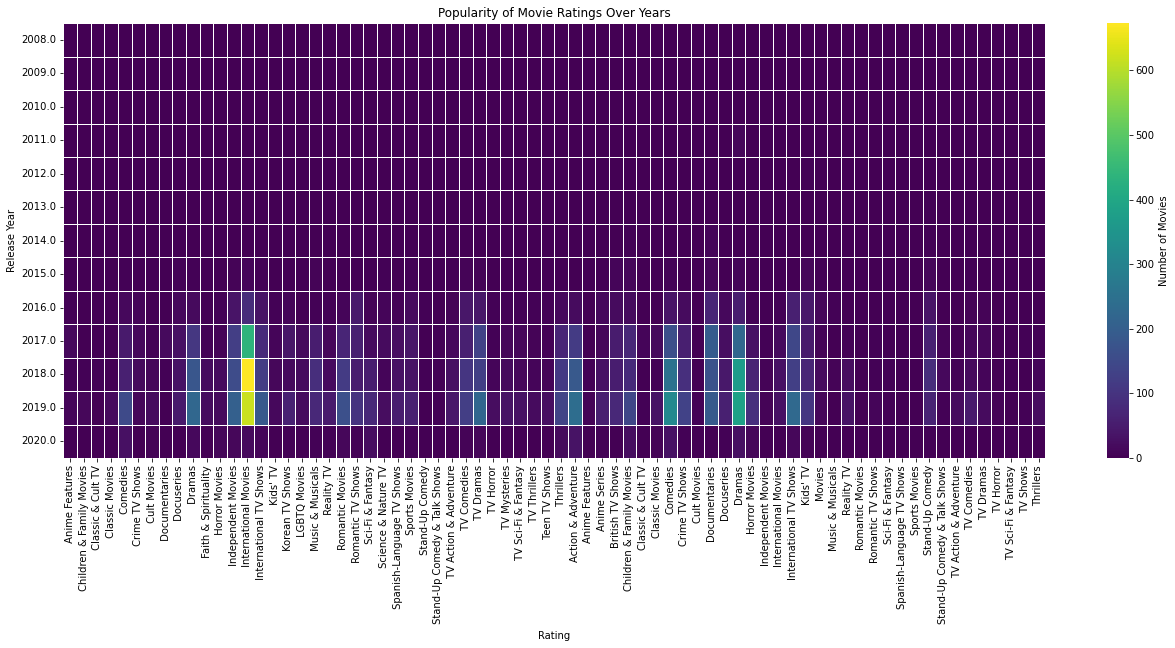

In [510]:
plt.figure(figsize=(22, 8))
sns.heatmap(pivot1_data, cmap='viridis', annot=False, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Movies'})

# Titles and labels
plt.title('Popularity of Movie Ratings Over Years')
plt.xlabel('Rating')
plt.ylabel('Release Year')

# Show the plot
plt.show()

#### Added Years by Generes

In [501]:
data1['listed'] = data['listed_in'].str.split(',')

# Create a new DataFrame to store the exploded data
expanded_data_listed_in = data1.explode('listed')


In [504]:
pivot1_data = expanded_data_listed_in.pivot_table(index='added_year', columns='listed', aggfunc='size', fill_value=0)
pivot1_data

listed,Anime Features,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,Documentaries,Docuseries,Dramas,...,Sports Movies,Stand-Up Comedy,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Sci-Fi & Fantasy,TV Shows,Thrillers
added_year,,,,,,,,,,,,,,,,,,,,,
2008.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2009.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2012.0,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013.0,0,0,0,0,1,0,0,1,0,0,...,0,4,0,0,0,2,0,0,0,0
2014.0,0,0,0,0,2,0,0,0,0,0,...,0,4,0,0,1,1,0,0,0,0
2015.0,0,0,0,0,5,0,0,0,6,4,...,0,12,0,1,5,2,1,0,0,0
2016.0,5,1,0,0,15,8,1,0,15,16,...,0,36,1,2,6,7,0,0,2,1


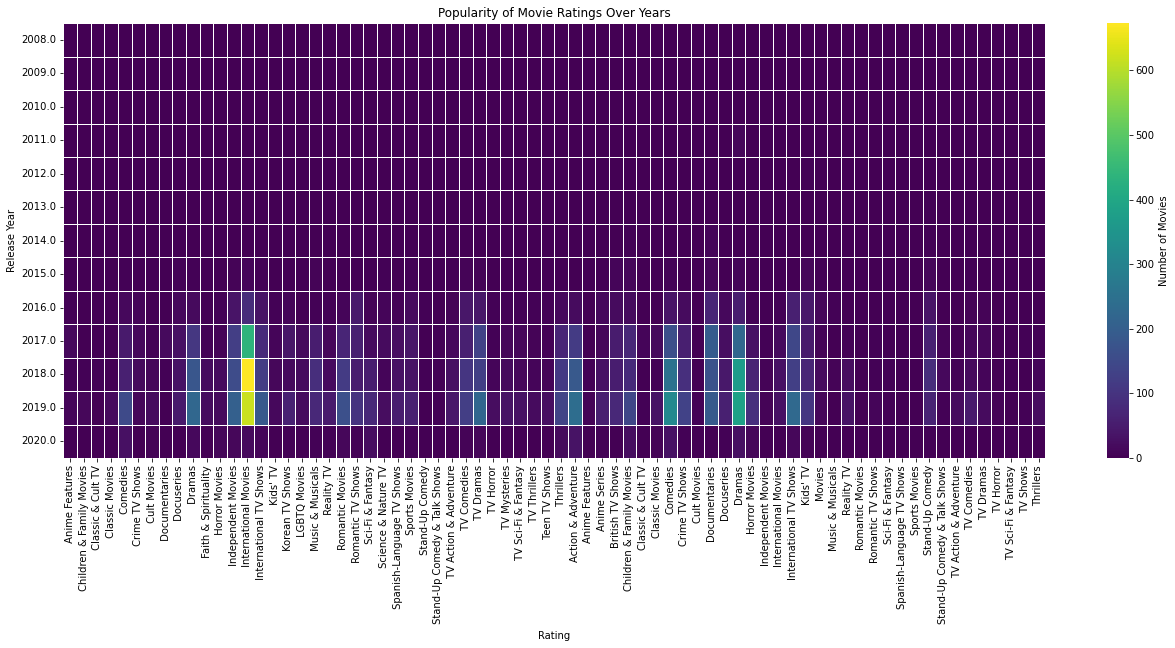

In [509]:
plt.figure(figsize=(22, 8))
sns.heatmap(pivot1_data, cmap='viridis', annot=False, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Movies'})

# Titles and labels
plt.title('Popularity of Movie Ratings Over Years')
plt.xlabel('Rating')
plt.ylabel('Release Year')

# Show the plot
plt.show()